* Python code replication of:
" https://www.kaggle.com/janniskueck/pm2-notebook-jannis "
* Created by: Alexander Quispe and Anzony Quispe 

### Simulation Design 1

In [1]:
import hdmpy
import numpy as np
import random
import pyreadr
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib import colors
import warnings; warnings.simplefilter('ignore')

#### 1. Simulation design B=50

In [2]:
np.random.seed(0)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [3]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]


In [4]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Difference between Naive-True')

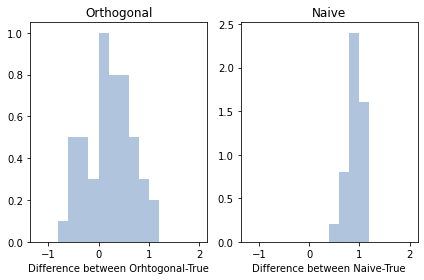

In [5]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# Creating histogram
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="lightsteelblue")
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks , color="lightsteelblue" )
 

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Difference between Orhtogonal-True' )
axs[1].set_xlabel( 'Difference between Naive-True' )

#### 2. Simulation design B=100

In [6]:
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [7]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [8]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Difference between Naive-True')

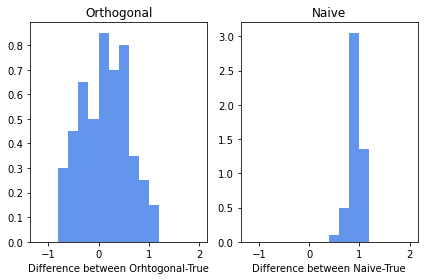

In [9]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="cornflowerblue")
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks , color="cornflowerblue" )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Difference between Orhtogonal-True' )
axs[1].set_xlabel( 'Difference between Naive-True' )

#### 3. Simulation design B=1000

In [7]:
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )


In [ ]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [ ]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]


In [ ]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks, color="navy" )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks, color="navy")

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Difference between Orhtogonal-True' )
axs[1].set_xlabel( 'Difference between Naive-True' )

As we can see on the grahics, the ortogonal distribution is centered on 0, as a normal distribution. In the case of the naive histogram, is not centered exactly on 0, because the distributions of the coeficients is not as a normal.  

Why dos this happen? We a simple explanation is that first, the X variable on a regression is not correlated with the error. So, if we have a histogram with a distribution different no a normal distribution, it means that the regression has a bias problem and the distribution of the coefficients is not as a normal, that brings problems at the time to measure effects.

# Double Lasso

It's a method that is used to infer the predictive effect of a specific covariable using Lasso twice in a Partialling-Out process. This is useful when having a high-dimensional regression, that is when p/n is not small where p is the number of regressor or covariates and n the number of observtations.

Having the objetive equation, in which $Y$ is the outcome, $D$ is our variable of interest and $W$ is a set of covariates:

  $$
  Y = \alpha D +  \beta_2'W + \epsilon.
  $$

We apply in Partialling-out approach the Lasso method when estimating the residuals of the first part. That is, we regress $Y$ and $W$, as well as $D$ and $W$ using Lasso and obtained the following estimators:

$$ \hat{\gamma_{YW}} = arg min  \sum_{i} (Y_i - \gamma' W_i)^2 + \lambda_1 \sum_{j} \hat{\Psi_j} | \gamma_j | $$

$$ \hat{\gamma_{DW}} = arg min  \sum_{i} (D_i - \gamma' W_i)^2 + \lambda_2 \sum_{j} \hat{\Psi_j} | \gamma_j | $$


With this, we estimte the residuals:

$$ \tilde{Y_i} = Y_i - \hat{\gamma'_{YW}} W_i  $$

$$ \tilde{D_i} = D_i - \hat{\gamma'_{DW}} W_i  $$

And finally, we use OLS to obtain $\alpha$, the coefficient of our variable of interest $D$:

$$ \hat{\alpha} = arg min  E_{n} (\tilde{Y_i} - a \tilde{D_i})^2 = (E_n \tilde{D_i}' \tilde{D_i}) ^{-1} E_n ( \tilde{D_i}' \tilde{Y_i})   $$

This method takes advantage of both the Partialling-out process, and the Lasso regression, both having valuable characteristics when dealing with high-dimensional regressions. 

# Testing the Convergence Hypothesis

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the **initial wealth levels in each country ($D$)** controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. 

Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.


The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [1]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random
import warnings; warnings.simplefilter('ignore')

In [2]:
# Import data
growth_read = pyreadr.read_r("C:/Users/Stephy/Documents/GitHub/ECO224/Labs/data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth) # the column names

['Outcome',
 'intercept',
 'gdpsh465',
 'bmp1l',
 'freeop',
 'freetar',
 'h65',
 'hm65',
 'hf65',
 'p65',
 'pm65',
 'pf65',
 's65',
 'sm65',
 'sf65',
 'fert65',
 'mort65',
 'lifee065',
 'gpop1',
 'fert1',
 'mort1',
 'invsh41',
 'geetot1',
 'geerec1',
 'gde1',
 'govwb1',
 'govsh41',
 'gvxdxe41',
 'high65',
 'highm65',
 'highf65',
 'highc65',
 'highcm65',
 'highcf65',
 'human65',
 'humanm65',
 'humanf65',
 'hyr65',
 'hyrm65',
 'hyrf65',
 'no65',
 'nom65',
 'nof65',
 'pinstab1',
 'pop65',
 'worker65',
 'pop1565',
 'pop6565',
 'sec65',
 'secm65',
 'secf65',
 'secc65',
 'seccm65',
 'seccf65',
 'syr65',
 'syrm65',
 'syrf65',
 'teapri65',
 'teasec65',
 'ex1',
 'im1',
 'xr65',
 'tot1']

We determine the dimension of our data set.

In [3]:
growth.shape

(90, 63)

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. 

**Here, we are going to estimate the method using 1.OLS, 2.Double Lasso using CV, 3.Double Lasso using theoretical Lambda and 4.Double Lasso using"partialling out".**

We expect the least squares method to provide a poor estimate of $\beta_1$. We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
# We create the main variables (y,x,X_w=W, X_g=D)
y = growth['Outcome']
X = growth.drop(['Outcome', 'intercept'], 1)
X

,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,pm65,pf65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
0,6.591674,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29,0.37,0.21,...,0.04,0.033,0.057,0.010,47.6,17.3,0.0729,0.0667,0.348,-0.014727
1,6.829794,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91,1.00,0.65,...,0.64,0.173,0.274,0.067,57.1,18.0,0.0940,0.1438,0.525,0.005750
2,8.895082,0.0000,0.204244,0.009186,0.260,0.325,0.201,1.00,1.00,1.00,...,18.14,2.573,2.478,2.667,26.5,20.7,0.1741,0.1750,1.082,-0.010040
3,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,1.00,1.00,...,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
4,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,0.85,0.81,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8.991064,0.0000,0.371898,0.014586,0.255,0.336,0.170,0.98,0.99,1.00,...,11.41,2.226,2.494,1.971,27.5,15.9,0.4407,0.4257,2.529,-0.011883
86,8.025189,0.0050,0.296437,0.013615,0.108,0.117,0.093,1.00,1.00,0.96,...,1.95,0.510,0.694,0.362,20.2,15.7,0.1669,0.2201,25.553,-0.039080
87,9.030137,0.0000,0.265778,0.008629,0.288,0.337,0.237,1.00,1.00,0.95,...,25.64,2.727,2.664,2.788,20.4,9.4,0.3238,0.3134,4.152,0.005175
88,8.865312,0.0000,0.282939,0.005048,0.188,0.236,0.139,1.00,1.00,1.00,...,10.76,1.888,1.920,1.860,20.0,16.0,0.1845,0.1940,0.452,-0.029551


In [6]:
W = growth.drop(['Outcome','gdpsh465', 'intercept'], 1)
D = growth ['gdpsh465']

### 1. OLS

In [7]:
# OLS regression
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              7.035
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    1.14e-07
Time:                        17:27:23   Log-Likelihood:                          238.08
No. Observations:                  90   AIC:                                     -354.2
Df Residuals:                      29   BIC:                                     -201.7
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci_ols = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci_ols = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

## Summarize OLS results

In [9]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci_ols
table_1[0,3] = upper_ci_ols    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_1_pandas.index = [ "OLS" ]
table_1_html = table_1_pandas.to_html()
table_1_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS</th>\n      <td>-0.010639</td>\n      <td>0.029155</td>\n      <td>-0.070267</td>\n      <td>0.048989</td>\n    </tr>\n  </tbody>\n</table>'

<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

OLS provides a rather noisy estimate (high standard error) of the speed of convergence, and does not allow us to answer the question about the convergence hypothesis since the confidence interval includes zero, *meaning that he estimator is not significant*.

## 2. Double Lasso using Cross Validation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

#### splitting data in train and test for W and Y

In [11]:
W_train, W_test, y_train, y_test = train_test_split(W, y, test_size=0.25, random_state=0)

In [12]:
#determining a set of lambdas to test wich one is the best
l_min = 0.05
l_max = 0.3
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)
lambdas

array([0.05      , 0.06315789, 0.07631579, 0.08947368, 0.10263158,
       0.11578947, 0.12894737, 0.14210526, 0.15526316, 0.16842105,
       0.18157895, 0.19473684, 0.20789474, 0.22105263, 0.23421053,
       0.24736842, 0.26052632, 0.27368421, 0.28684211, 0.3       ])

In [13]:
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [14]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(W_train, y_train)
    results = cross_val_score(reg, W, y, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(W_train, y_train)    
    test_r_squared[ind] = reg.score(W_test, y_test)

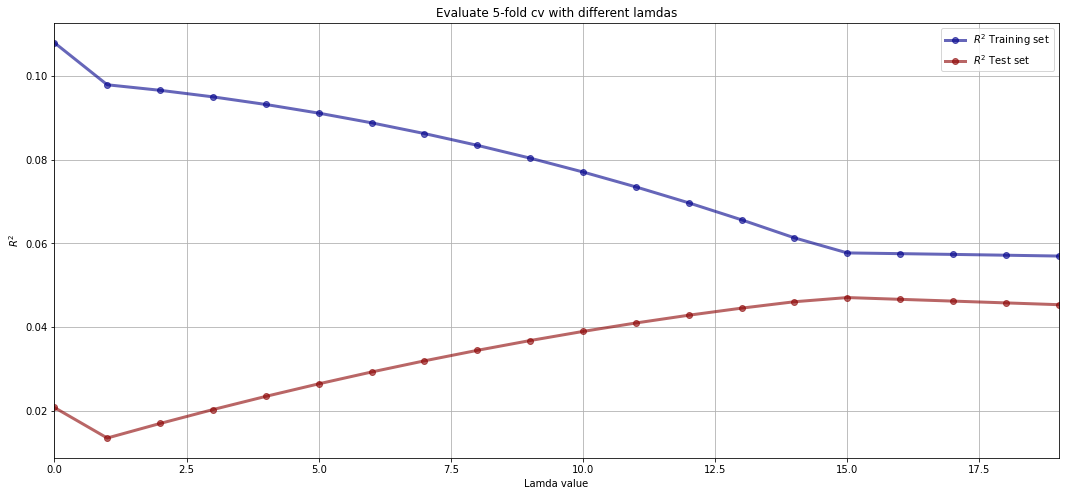

In [15]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [16]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
df_lam.loc[df_lam['R_squared'].idxmax()]

#our optimal lambda for Y an W is 0.24736842

R_squared    4.705263
lambda       0.247368
Name: 15, dtype: float64

In [17]:
#estimate the residuals
reg_1 = Lasso(alpha = 0.247368)
reg_1.fit(W_test, y_test)
Y_lasso_fitted = reg_1.fit(W_test, y_test).predict( W_test)
e_yw=y_test-Y_lasso_fitted
e_yw

2     0.028258
13    0.037050
53   -0.039389
41   -0.022929
66   -0.060131
30    0.042668
45   -0.043436
43    0.026697
78    0.054136
89    0.002804
7    -0.018552
26    0.070947
33    0.030146
63   -0.121028
8    -0.014732
16   -0.008714
24   -0.026155
56   -0.063444
77    0.147115
42   -0.034740
22    0.066233
6     0.024065
61   -0.076868
Name: Outcome, dtype: float64

#### splitting data in train and test for D and Y

In [18]:
W_train_2, W_test_2, D_train, D_test = train_test_split(W, D, test_size=0.25, random_state=0)

In [19]:
#determining a set of lambdas to test wich one is the best
l_min = 0.05
l_max = 0.3
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)
lambdas

array([0.05      , 0.06315789, 0.07631579, 0.08947368, 0.10263158,
       0.11578947, 0.12894737, 0.14210526, 0.15526316, 0.16842105,
       0.18157895, 0.19473684, 0.20789474, 0.22105263, 0.23421053,
       0.24736842, 0.26052632, 0.27368421, 0.28684211, 0.3       ])

In [20]:
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [21]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(W_train_2, D_train)
    results = cross_val_score(reg, W, D, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(W_train_2, D_train)    
    test_r_squared[ind] = reg.score(W_test_2, D_test)

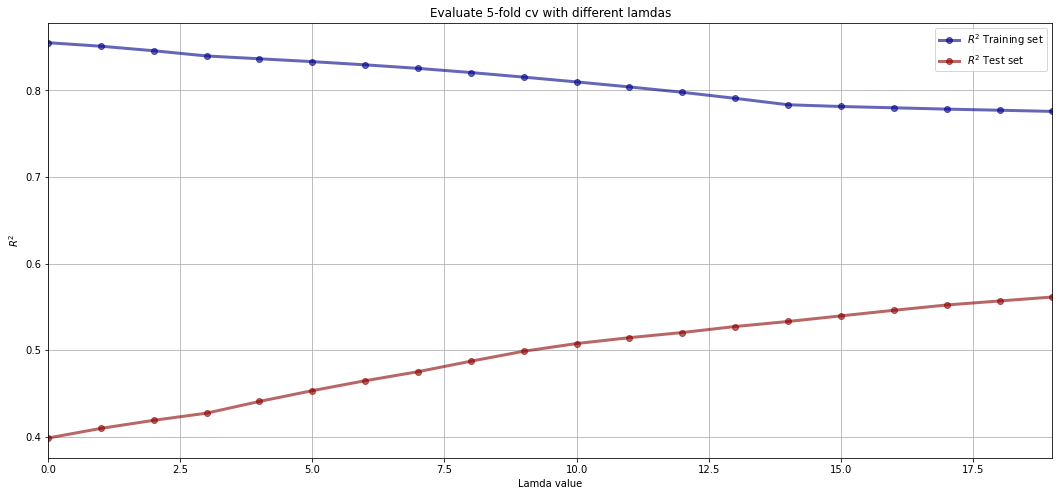

In [22]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [23]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
df_lam.loc[df_lam['R_squared'].idxmax()]

#our optimal lambda for Y an W is 0.300000

R_squared    56.128942
lambda        0.300000
Name: 19, dtype: float64

In [24]:
#estimate residual
reg_1 = Lasso(alpha = 0.300000)
reg_1.fit(W_test_2, D_test)
D_lasso_fitted = reg_1.fit(W_test_2, D_test).predict( W_test_2)
e_dw=D_test-D_lasso_fitted
e_dw

2     0.381650
13   -0.519647
53   -0.034483
41    0.351945
66   -0.039664
30    0.362918
45   -0.691166
43   -0.216566
78    0.411289
89    0.161517
7     0.446828
26    0.168157
33   -0.301609
63   -0.162799
8     0.035788
16   -0.070611
24   -0.272957
56   -0.382691
77    0.451744
42    0.341262
22   -0.266387
6     0.228721
61   -0.383239
Name: gdpsh465, dtype: float64

In [25]:
#estimate with ols
reg_ols_2  = sm.OLS(e_yw, e_dw).fit()
print(reg_ols_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.146
Model:                            OLS   Adj. R-squared (uncentered):              0.107
Method:                 Least Squares   F-statistic:                              3.768
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                      0.0652
Time:                        17:27:29   Log-Likelihood:                          35.046
No. Observations:                  23   AIC:                                     -68.09
Df Residuals:                      22   BIC:                                     -66.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
est_dlasso_c =  reg_ols_2.summary2().tables[1]['Coef.']['gdpsh465']
std_dlasso_c  = reg_ols_2.summary2().tables[1]['Std.Err.']['gdpsh465']
lower_ci_dlasso_c = reg_ols_2.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci_dlasso_c = reg_ols_2.summary2().tables[1]['0.975]']['gdpsh465']

## 3. Double Lasso using the theorical lambda

In [27]:
import multiprocess
import hdmpy

In [28]:
res_Y = hdmpy.rlasso( W, y, post=True ).est['residuals'] #lambda1=
res_D = hdmpy.rlasso( W, D, post=True ).est['residuals'] #lambda2=

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [29]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    0.000533
Time:                        17:27:33   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
# output: estimated regression coefficient corresponding to the target regressor
est_dlasso_t = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_dlasso_t = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_dlasso_t = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_dlasso_t = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [31]:
table_3 = np.zeros( (1, 4) )

table_3[0,0] = est_dlasso_t   
table_3[0,1] = std_dlasso_t    
table_3[0,2] = lower_ci_dlasso_t 
table_3[0,3] = upper_ci_dlasso_t     


table_3_pandas = pd.DataFrame( table_3, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_3_pandas.index = [ "LASSO" ]
table_3_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO,-0.049811,0.013858,-0.077347,-0.022276


## 4. Double Lasso using Partialling Out using HDMPY Direct

In [32]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=y, d=D, method="partialling out")
lasso_direct

{'alpha': -0.049811444837338376,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.049811444837338376,
 'coefficient': -0.049811444837338376,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
  

In [37]:
est_lasso = lasso_direct["coefficients"]
std_lasso = lasso_direct["se"]
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso


-0.049811444837338376

## Table comparison

In [48]:
table4 = np.zeros( (4, 4) )

#ols
table4[0,0] = est_ols   
table4[0,1] = std_ols  
table4[0,2] = lower_ci_ols 
table4[0,3] = upper_ci_ols     

#cv
table4[1,0] = est_dlasso_c   
table4[1,1] = std_dlasso_c    
table4[1,2] = lower_ci_dlasso_c
table4[1,3] = upper_ci_dlasso_c

table4[2,0] = est_dlasso_t   
table4[2,1] = std_dlasso_t    
table4[2,2] = lower_ci_dlasso_t 
table4[2,3] = upper_ci_dlasso_t

table4[3,0] = est_lasso  
table4[3,1] = std_lasso  
table4[3,2] = lower_ci_lasso
table4[3,3] = upper_ci_lasso

table4_pandas = pd.DataFrame( table4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table4_pandas.index = [ "OLS", "DLASSO-CV", "DLASSO-T", "DLASSO-D"]

table4_pandas =table4_pandas.reset_index()

table4_pandas

,index,Estimator,Std. Error,lower bound CI,upper bound CI
0,OLS,-0.010639,0.029155,-0.070267,0.048989
1,DLASSO-CV,0.065435,0.033711,-0.004478,0.135347
2,DLASSO-T,-0.049811,0.013858,-0.077347,-0.022276
3,DLASSO-D,-0.049811,0.015391,-0.079978,-0.019644


Here we can see 2 main conclusions: First, that the Double Lasso estimated with the theorical lambda is the same as the one calculated in the more direct way, but the bounds change (althought both of them are still significant). Second, we find that the Lasso using Cross Validation rejects the Converge hypothesis because not only the estimation effect is positive, but because is not significant. 

## Graph

KeyError: 'index'

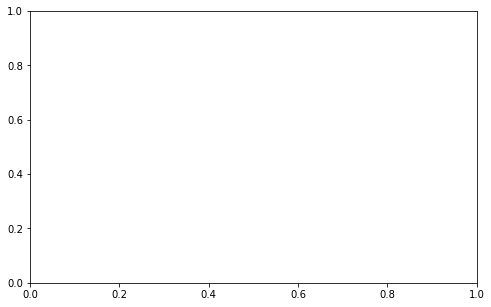

In [52]:
fig, ax = plt.subplots(figsize=(8, 5))
table_4_pandas.plot(x='index', y='Estimator', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(table4_pandas.shape[0]), 
           marker='s', s=120, 
           y=table4_pandas['Estimator'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['OLS', 'DLASSO_CV', 'DLASSO_T','DLASSO_direct'], 
                       rotation=45, fontsize=16)